In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
data=pd.read_csv('../clean_data/after_clean.csv')
data.head()

,Year,Jurisdiction,Gender,Average scale score
0,2022,National,Male,256.0
1,2022,National,Female,265.0
2,2022,Alabama,Male,245.0
3,2022,Alabama,Female,257.0
4,2022,Alaska,Male,245.0


In [4]:

data['Year'] = data['Year'].astype(str)
data.head()

,Year,Jurisdiction,Gender,Average scale score
0,2022,National,Male,256.0
1,2022,National,Female,265.0
2,2022,Alabama,Male,245.0
3,2022,Alabama,Female,257.0
4,2022,Alaska,Male,245.0


In [5]:
# find out teh jurisdiction 
states=data['Jurisdiction'].unique()
print(len(states))
print(states)

51
['National' 'Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho'
 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine'
 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi'
 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey'
 'New Mexico' 'New York' 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma'
 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina' 'South Dakota'
 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming']


In [6]:
# 5 states as a group for better plotting
states_1 = data['Jurisdiction'].unique()[:5]
states_2 = data['Jurisdiction'].unique()[5:10]
states_3 = data['Jurisdiction'].unique()[10:15]
states_4 = data['Jurisdiction'].unique()[15:20]
states_5 = data['Jurisdiction'].unique()[20:25]
states_6 = data['Jurisdiction'].unique()[25:30]
states_7 = data['Jurisdiction'].unique()[30:35]
states_8 = data['Jurisdiction'].unique()[35:40]
states_9 = data['Jurisdiction'].unique()[40:45]
states_10 = data['Jurisdiction'].unique()[45:]



In [7]:
# Pivot the data for plotting
pivot_data = data.pivot_table(index='Year', columns=['Jurisdiction', 'Gender'], values='Average scale score')

In [8]:
pivot_data.to_csv('../clean_data/pivot_data.csv')

In [9]:
pivot_data

Jurisdiction Alabama        Alaska        Arizona        Arkansas         \
Gender        Female   Male Female   Male  Female   Male   Female   Male   
Year                                                                       
2002           258.0  247.0  269.0  260.0   262.0  252.0    266.0  255.0   
2003           261.0  246.0  263.0  250.0   260.0  251.0    263.0  254.0   
2005           260.0  245.0  265.0  253.0   260.0  249.0    263.0  252.0   
2007           257.0  247.0  264.0  253.0   259.0  251.0    263.0  253.0   
2009           261.0  249.0  265.0  254.0   261.0  254.0    262.0  254.0   
2011           263.0  254.0  267.0  256.0   265.0  255.0    264.0  254.0   
2013           262.0  253.0  268.0  254.0   265.0  256.0    267.0  257.0   
2015           265.0  253.0  268.0  254.0   267.0  259.0    265.0  252.0   
2017           262.0  253.0  263.0  253.0   268.0  258.0    264.0  256.0   
2019           262.0  245.0  258.0  247.0   265.0  254.0    265.0  253.0   
2022           257.0  245.0  261.0  245.0   263.0  254.0    260.0  250.0   

Jurisdiction California         ... Virginia        Washington         \
Gender           Female   Male  ...   Female   Male     Female   Male   
Year                            ...                                     
2002              255.0  247.0  ...    275.0  264.0      275.0  261.0   
2003              255.0  247.0  ...    272.0  263.0      271.0  258.0   
2005              255.0  246.0  ...    273.0  263.0      269.0  260.0   
2007              257.0  246.0  ...    272.0  262.0      270.0  260.0   
2009              257.0  248.0  ...    271.0  260.0      273.0  261.0   
2011              261.0  249.0  ...    271.0  263.0      274.0  261.0   
2013              267.0  257.0  ...    273.0  262.0      277.0  268.0   
2015              263.0  255.0  ...    271.0  263.0      274.0  261.0   
2017              268.0  258.0  ...    273.0  263.0      277.0  266.0   
2019              264.0  253.0  ...    271.0  253.0      273.0  260.0   
2022              261.0  256.0  ...    265.0  255.0      264.0  259.0   

Jurisdiction West Virginia        Wisconsin        Wyoming         
Gender              Female   Male    Female   Male  Female   Male  
Year                                                               
2002                 268.0  259.0     269.0  260.0   271.0  260.0  
2003                 265.0  254.0     274.0  259.0   272.0  262.0  
2005                 261.0  250.0     273.0  261.0   272.0  264.0  
2007                 262.0  248.0     272.0  257.0   271.0  261.0  
2009                 262.0  248.0     271.0  260.0   271.0  265.0  
2011                 263.0  250.0     272.0  262.0   274.0  265.0  
2013                 263.0  251.0     275.0  261.0   277.0  265.0  
2015                 264.0  256.0     275.0  264.0   275.0  263.0  
2017                 266.0  252.0     277.0  262.0   276.0  262.0  
2019                 263.0  249.0     275.0  260.0   270.0  260.0  
2022                 255.0  244.0     266.0  258.0   268.0  254.0  

[11 rows x 102 columns]

In [13]:
def plot(sample_states):
    fig, axes = plt.subplots(nrows=1, ncols=len(sample_states), figsize=(5 * len(sample_states), 10), sharey=True)
    fig.suptitle('Average Mathematics Score By Gender Over Time for Selected States', fontsize=16)
    colors=['#C497B2','#14517C']
    y_min,y_max=200,300
# Loop through the states to create horizontal subplots
    for ax, state in zip(axes, sample_states):
        pivot_data[state].plot(ax=ax, marker='o',color=colors)
        ax.set_title(state)
        ax.set_xlabel('Year')
        ax.set_ylabel('Average Scale Score')
        ax.set_ylim(y_min,y_max)
        ax.legend(title='Gender')

# Adjust the layout
    plt.style.use('my_style')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

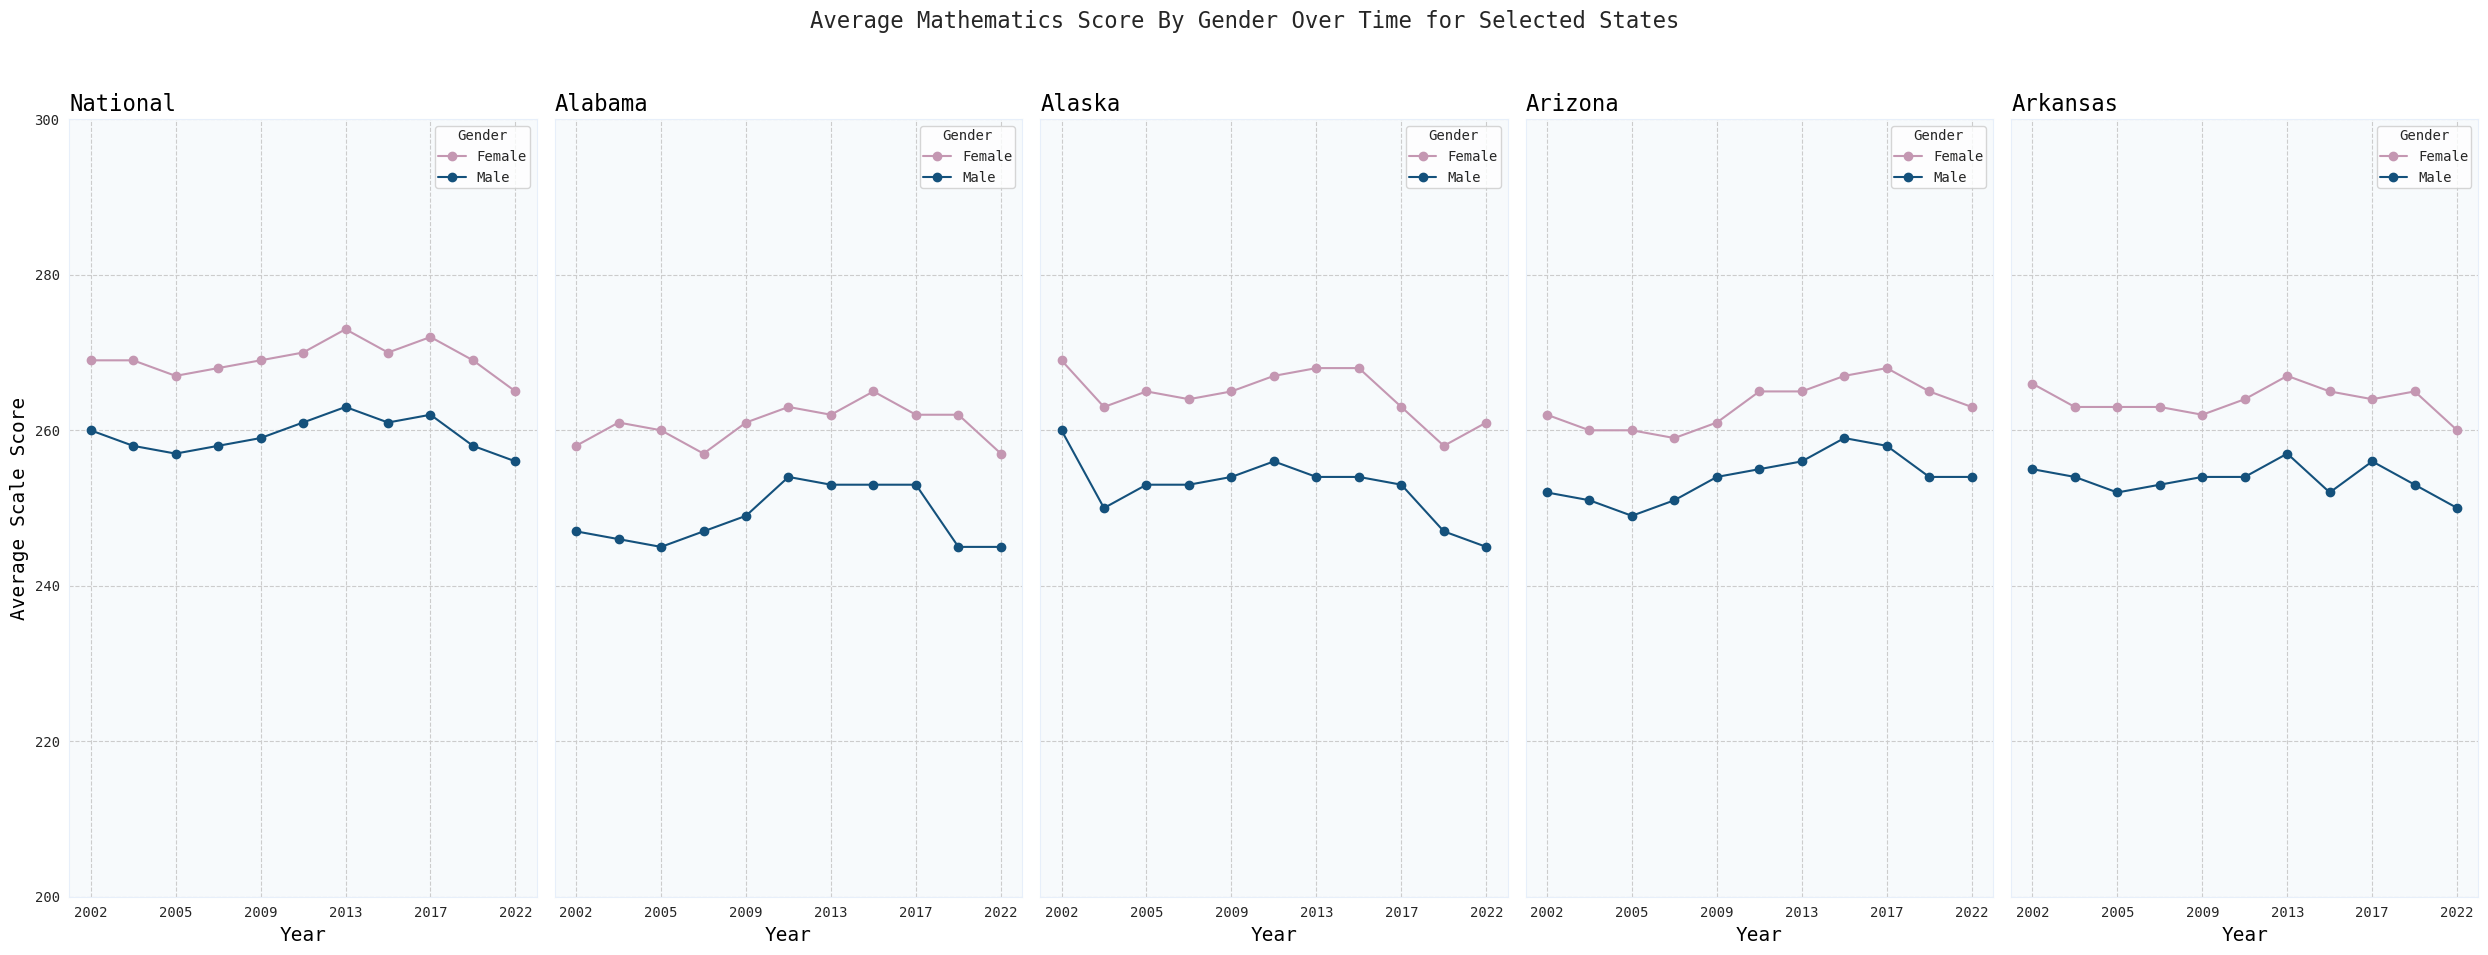

In [14]:
plot(states_1)

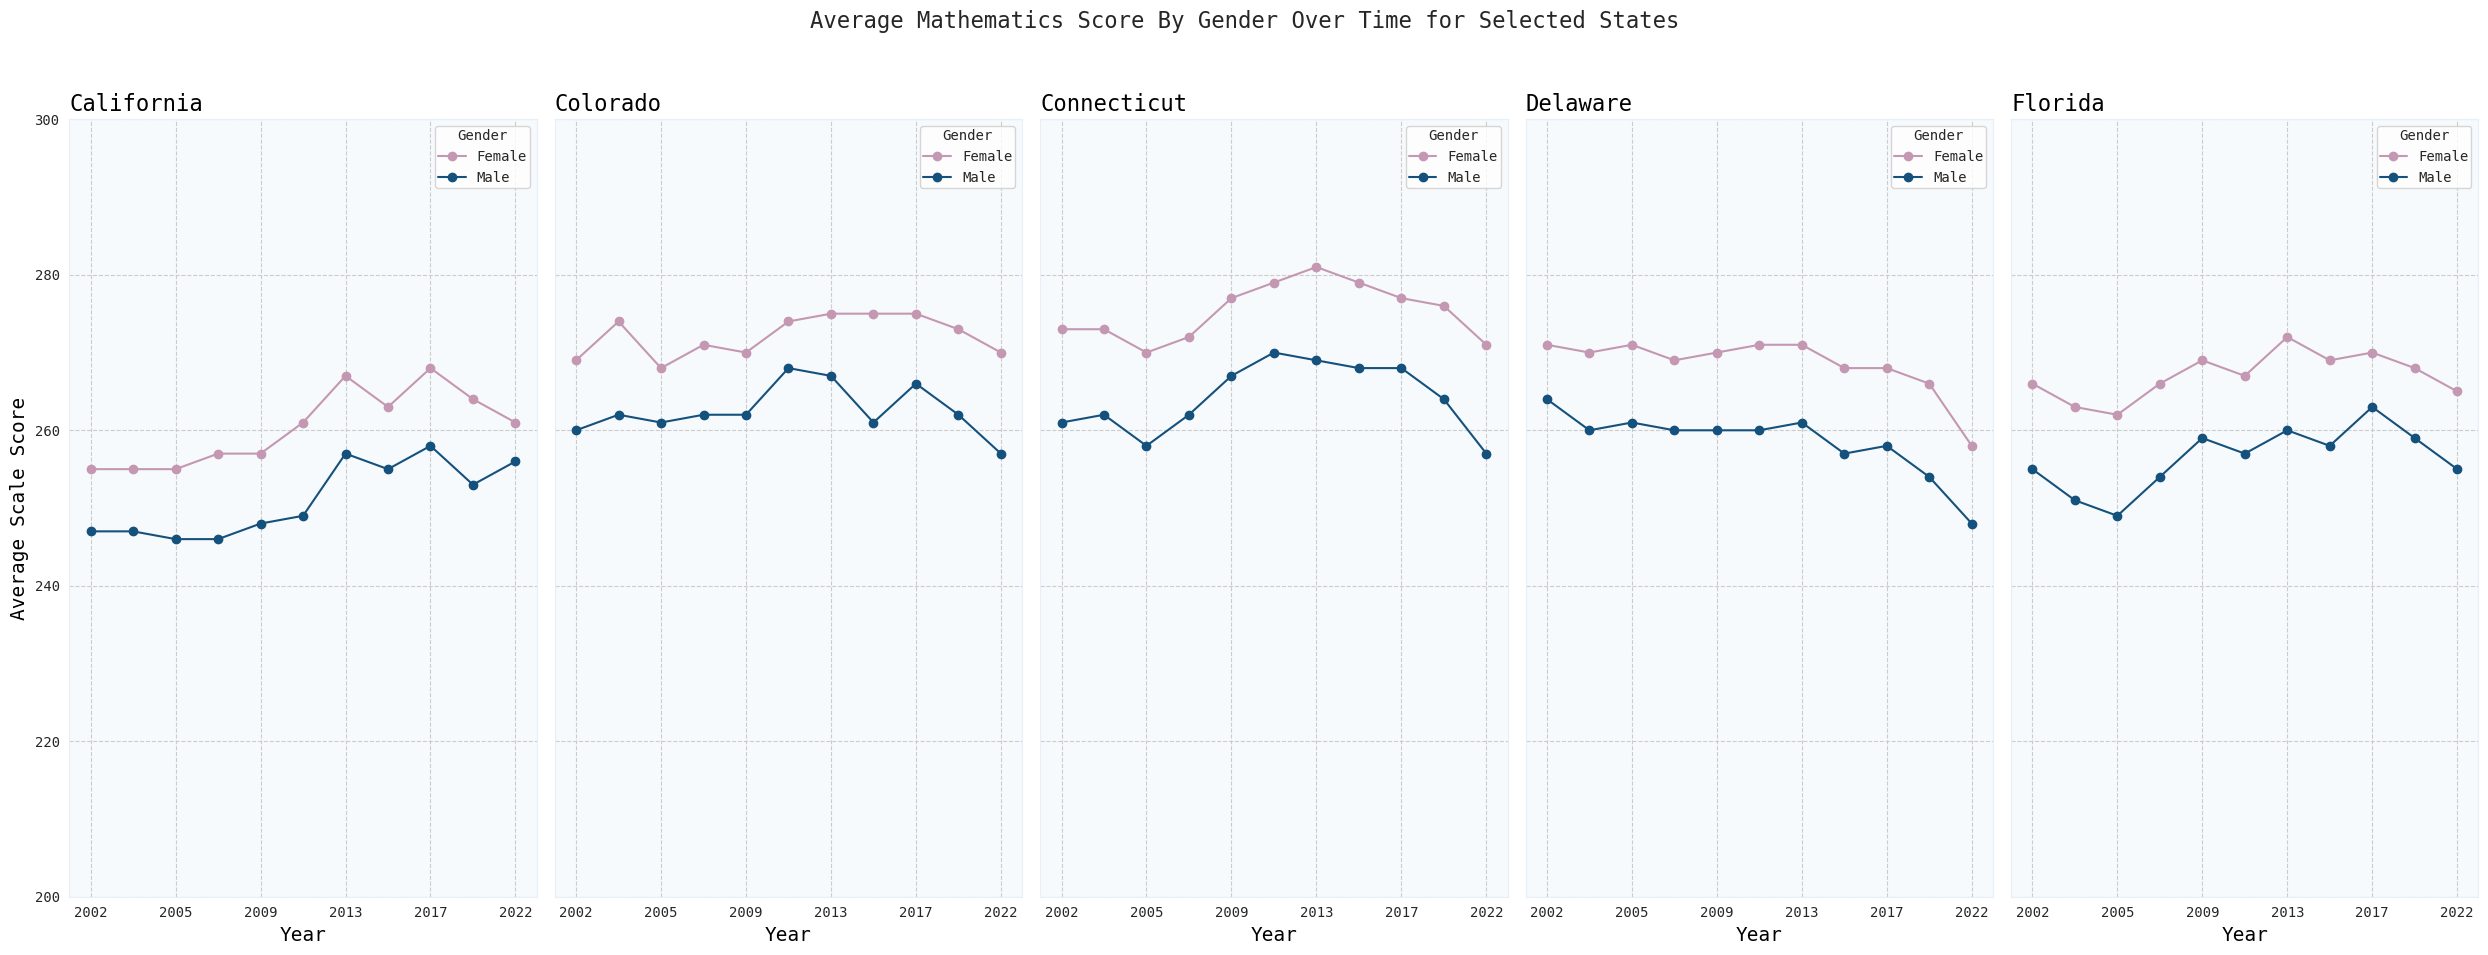

In [15]:
plot(states_2)

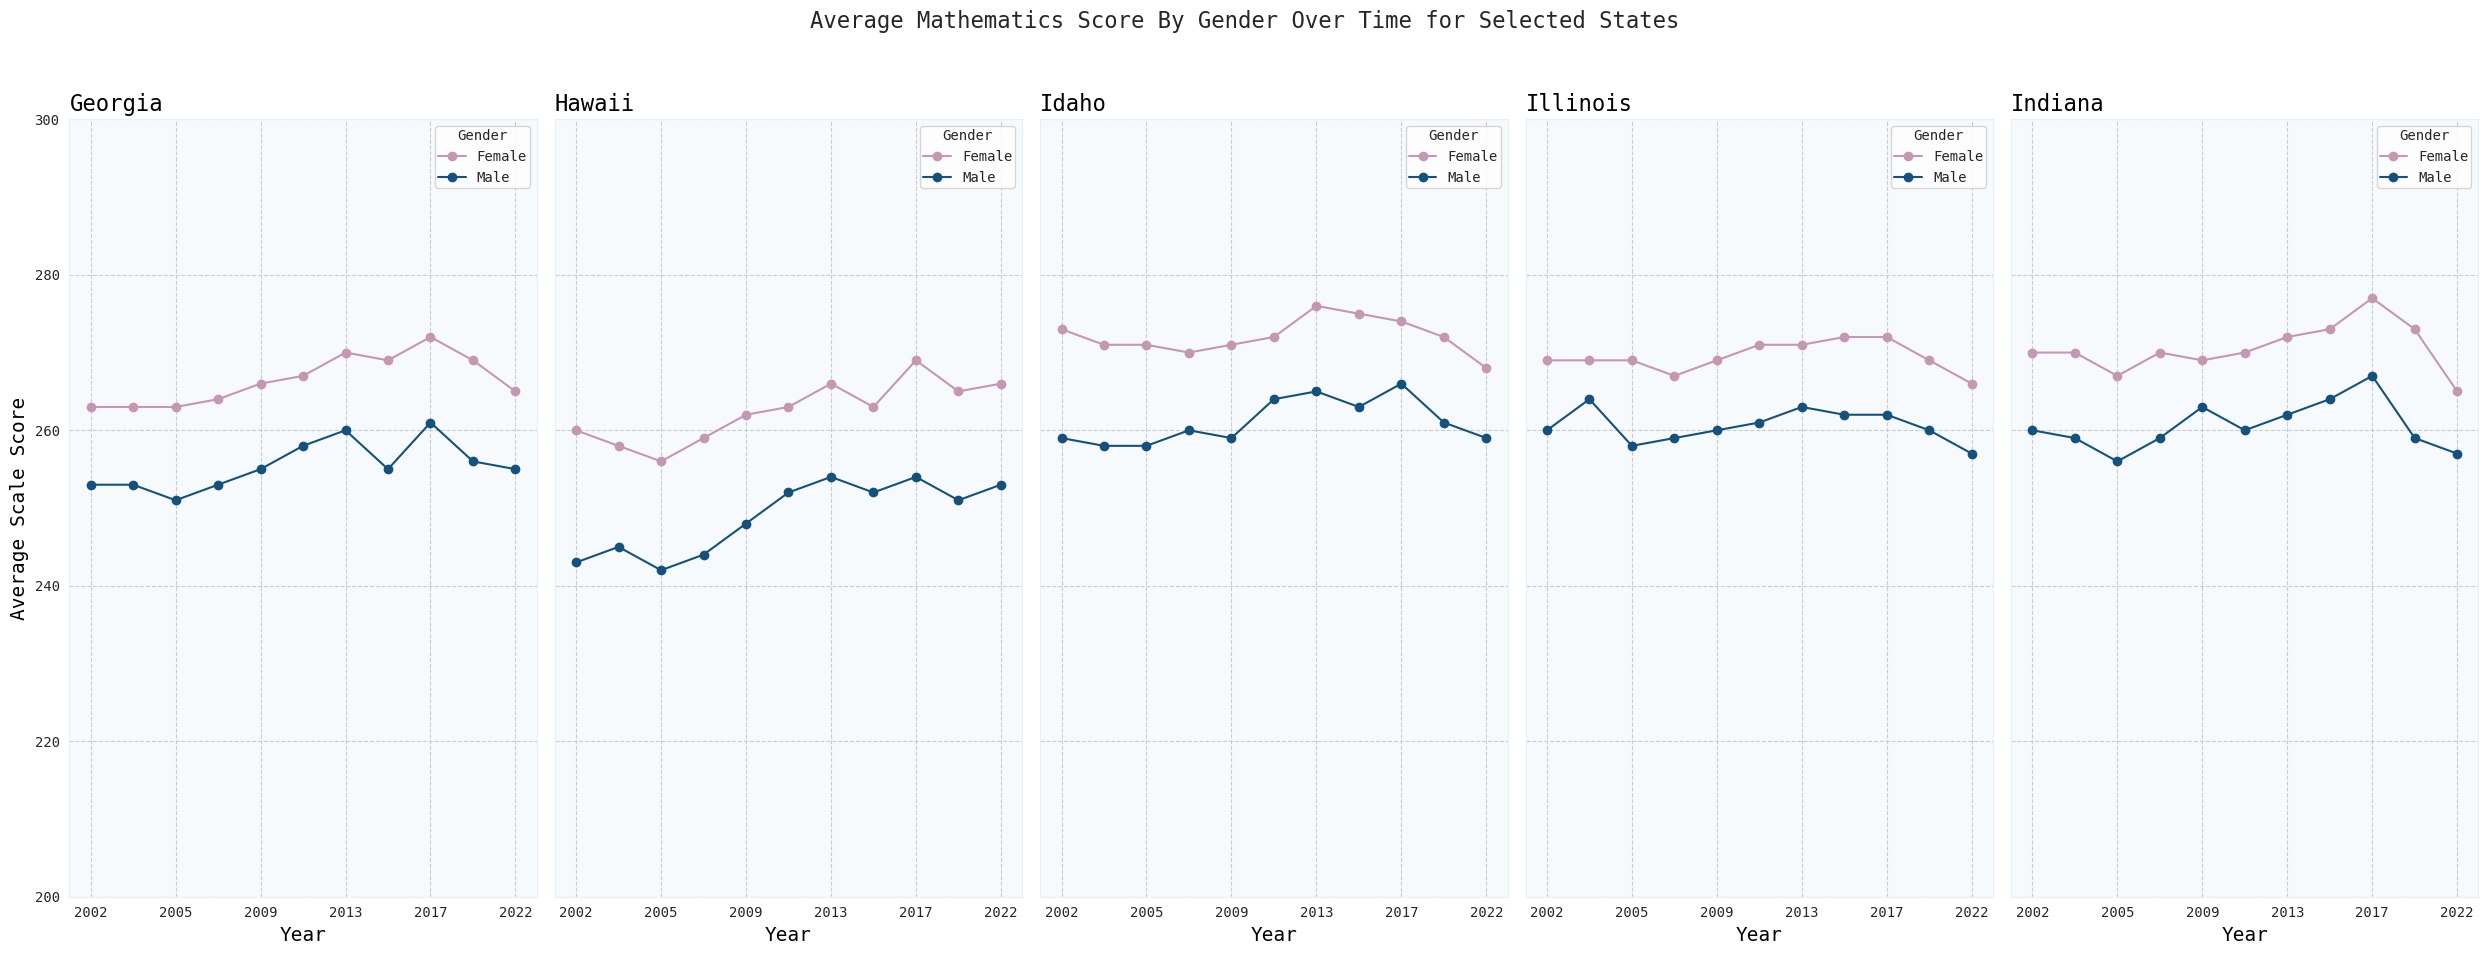

In [16]:
plot(states_3)

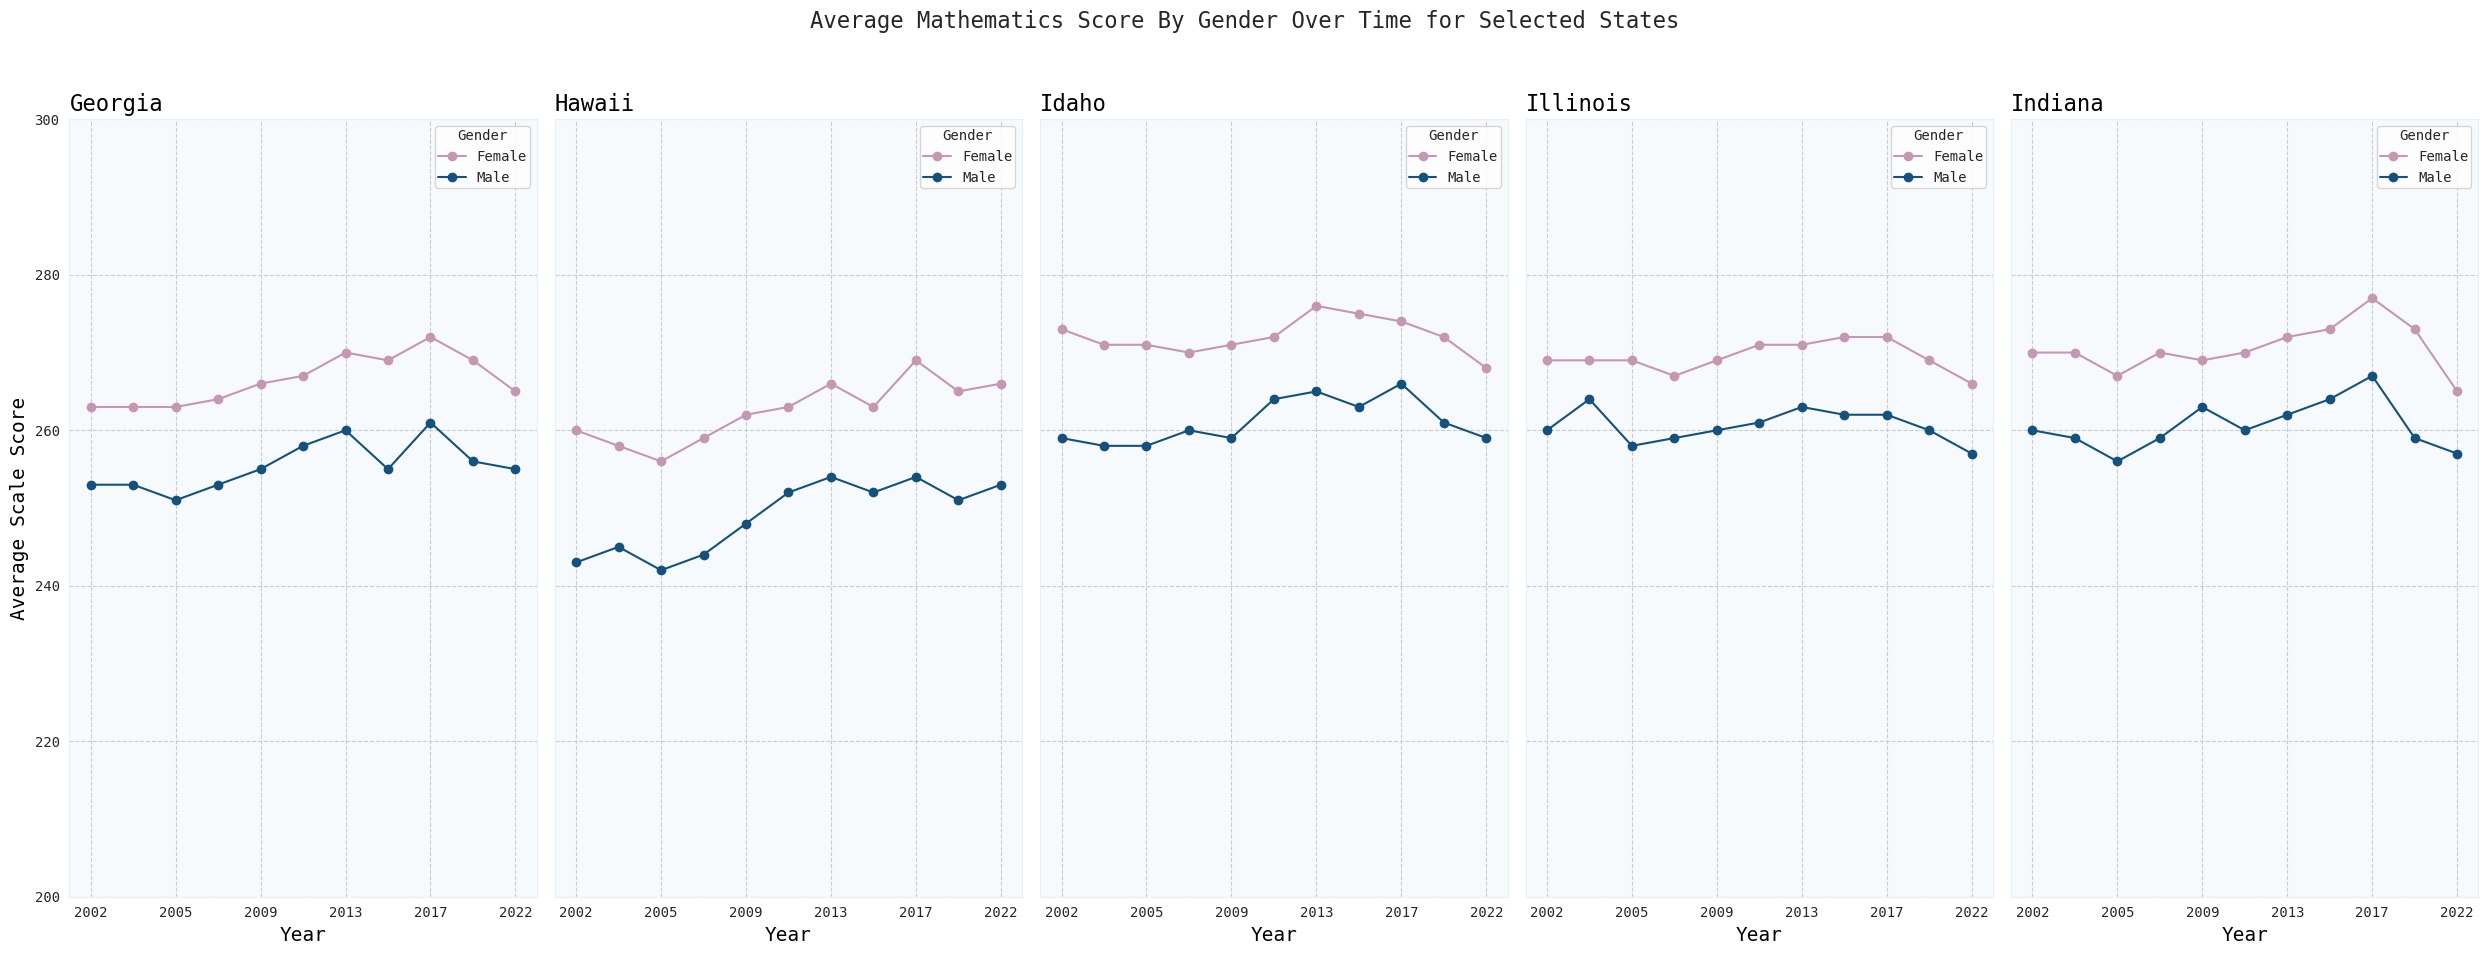

In [17]:
plot(states_3)

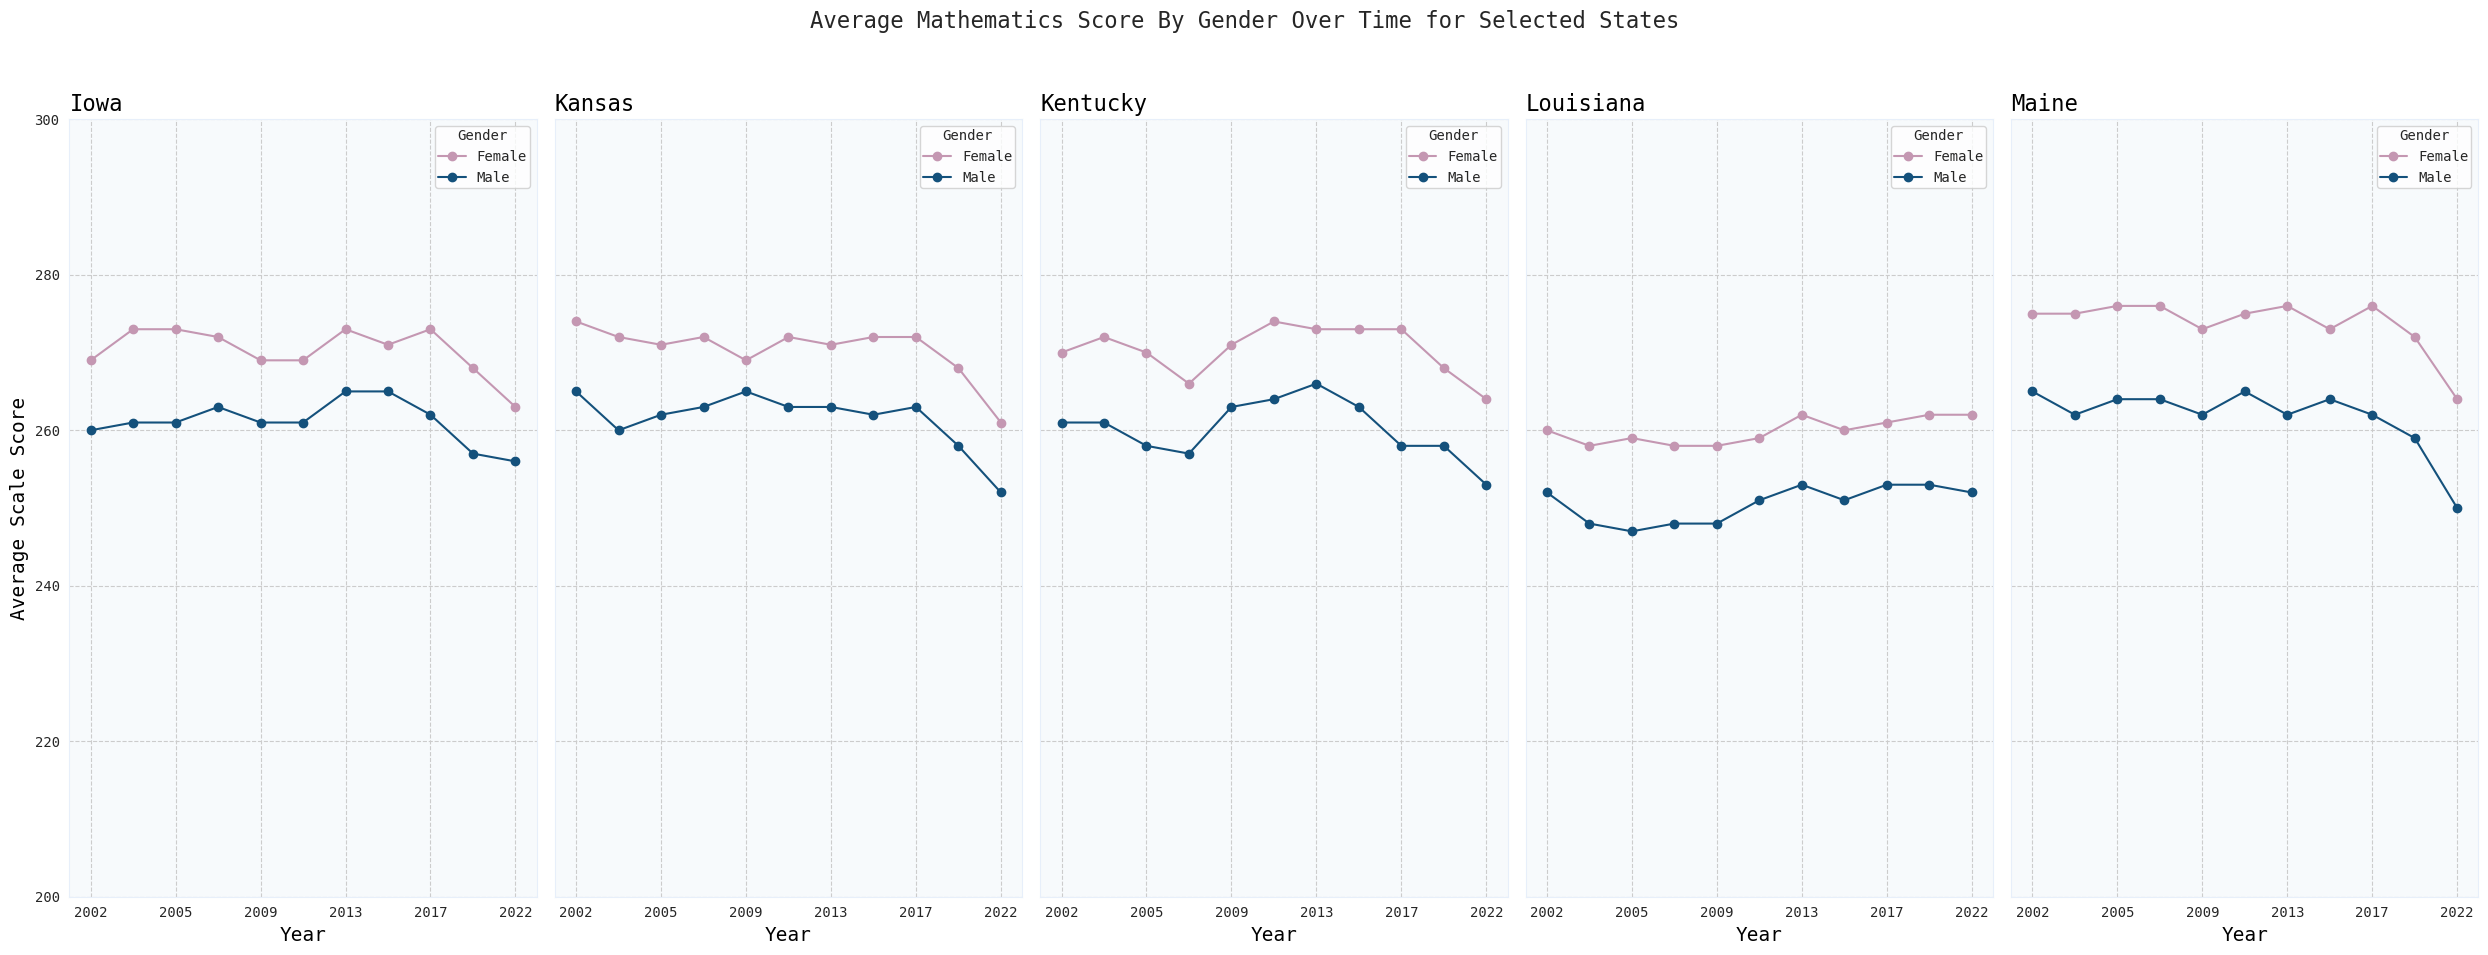

In [18]:
plot(states_4)

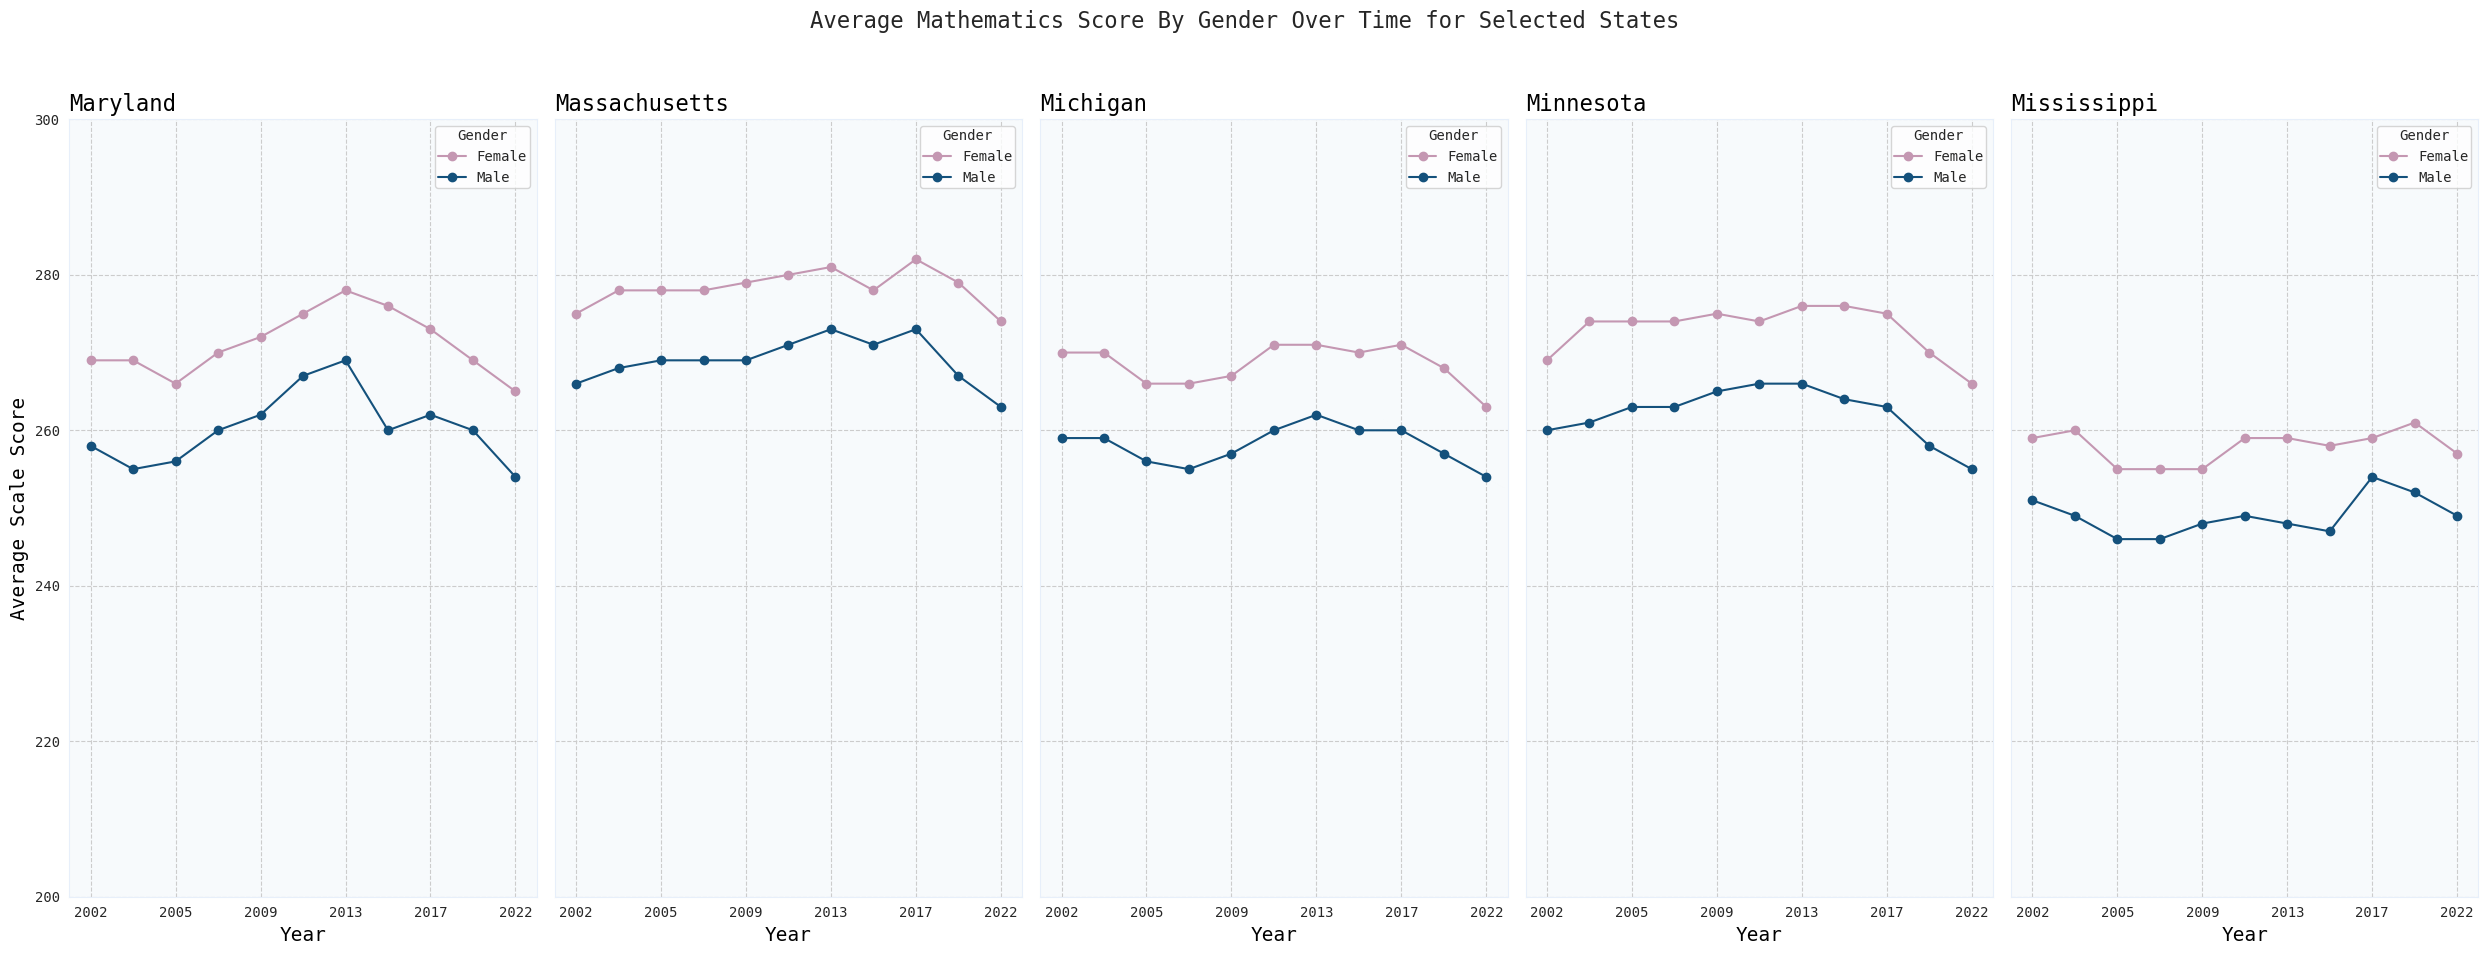

In [19]:
plot(states_5)

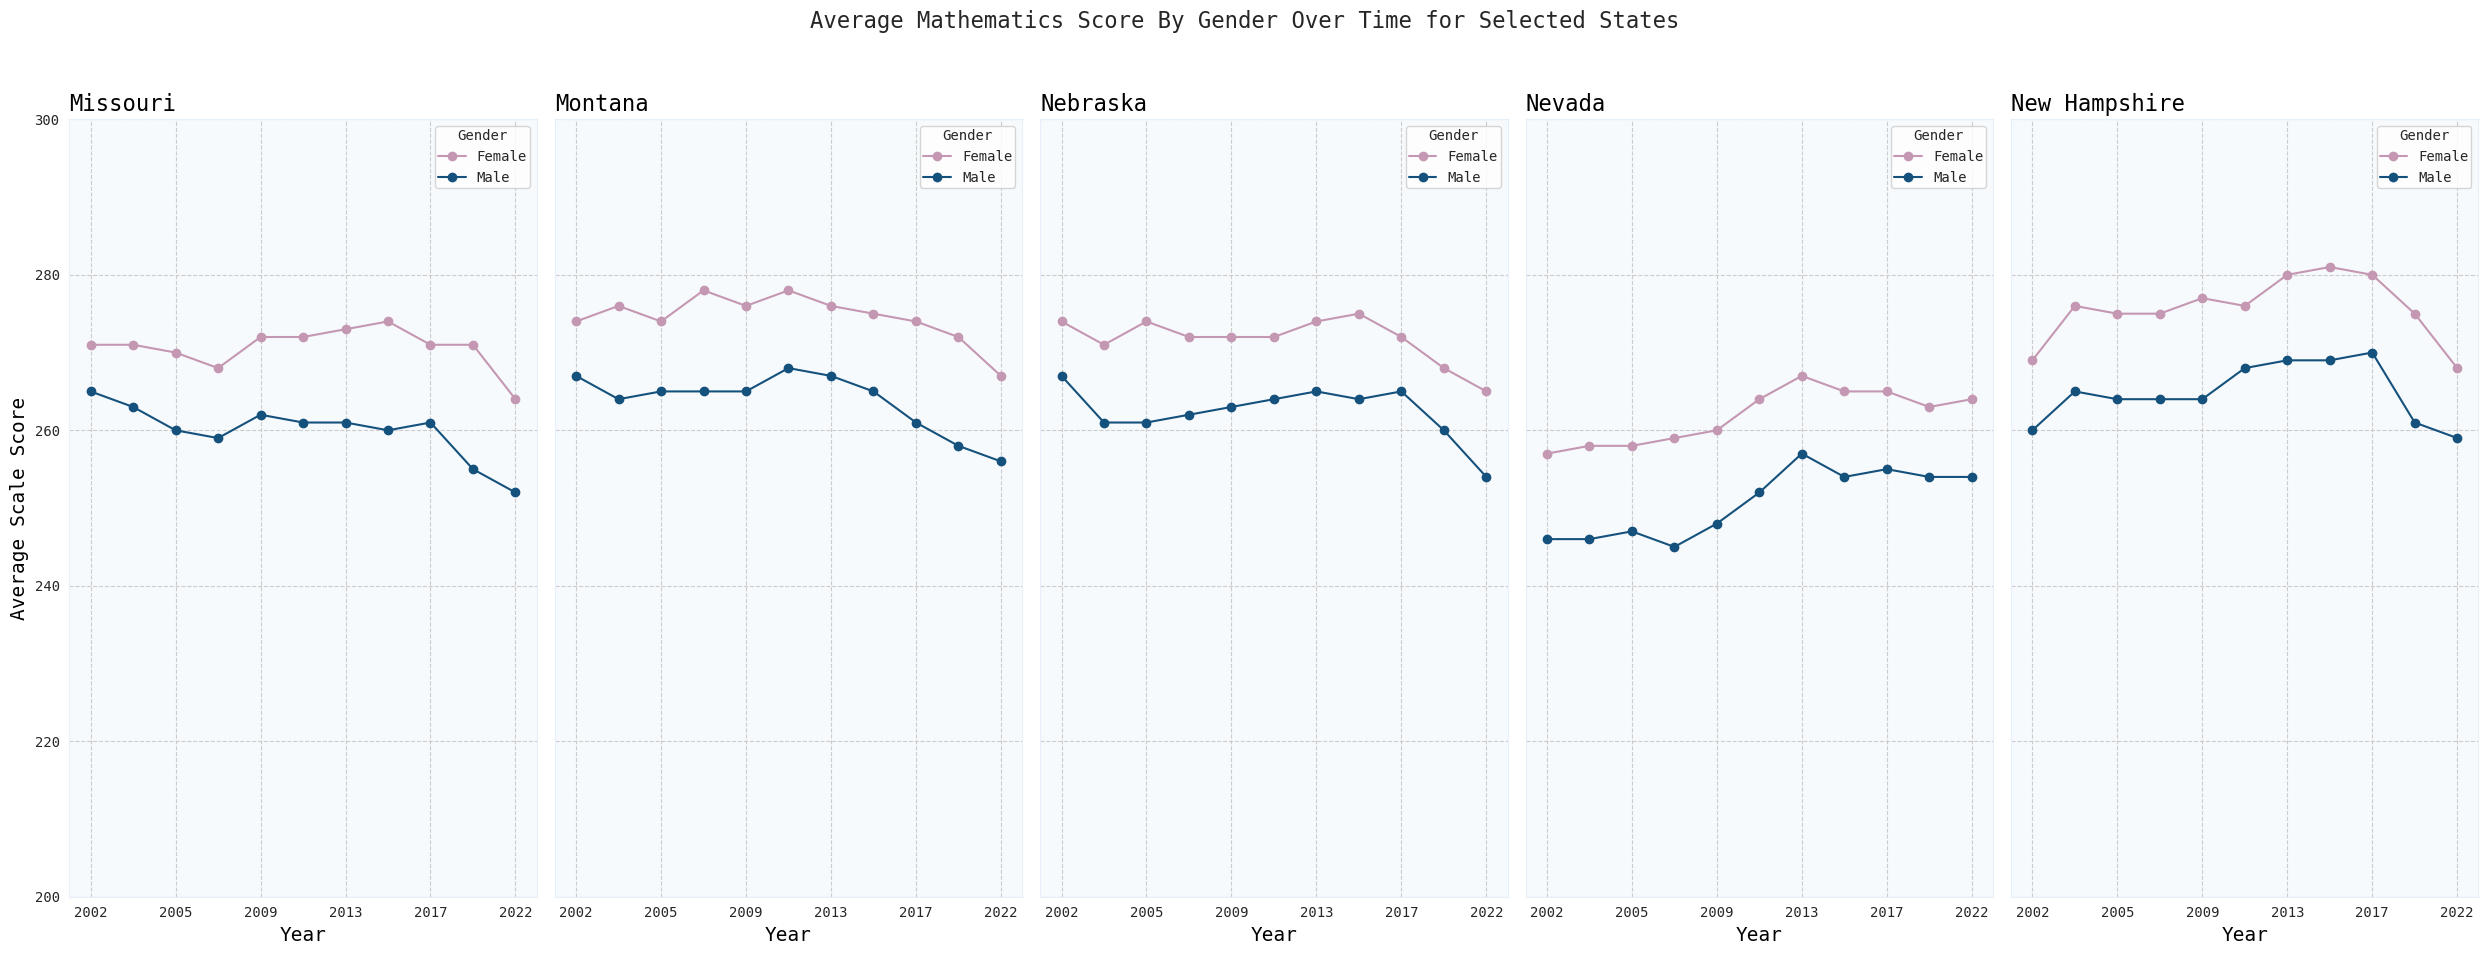

In [20]:
plot(states_6)

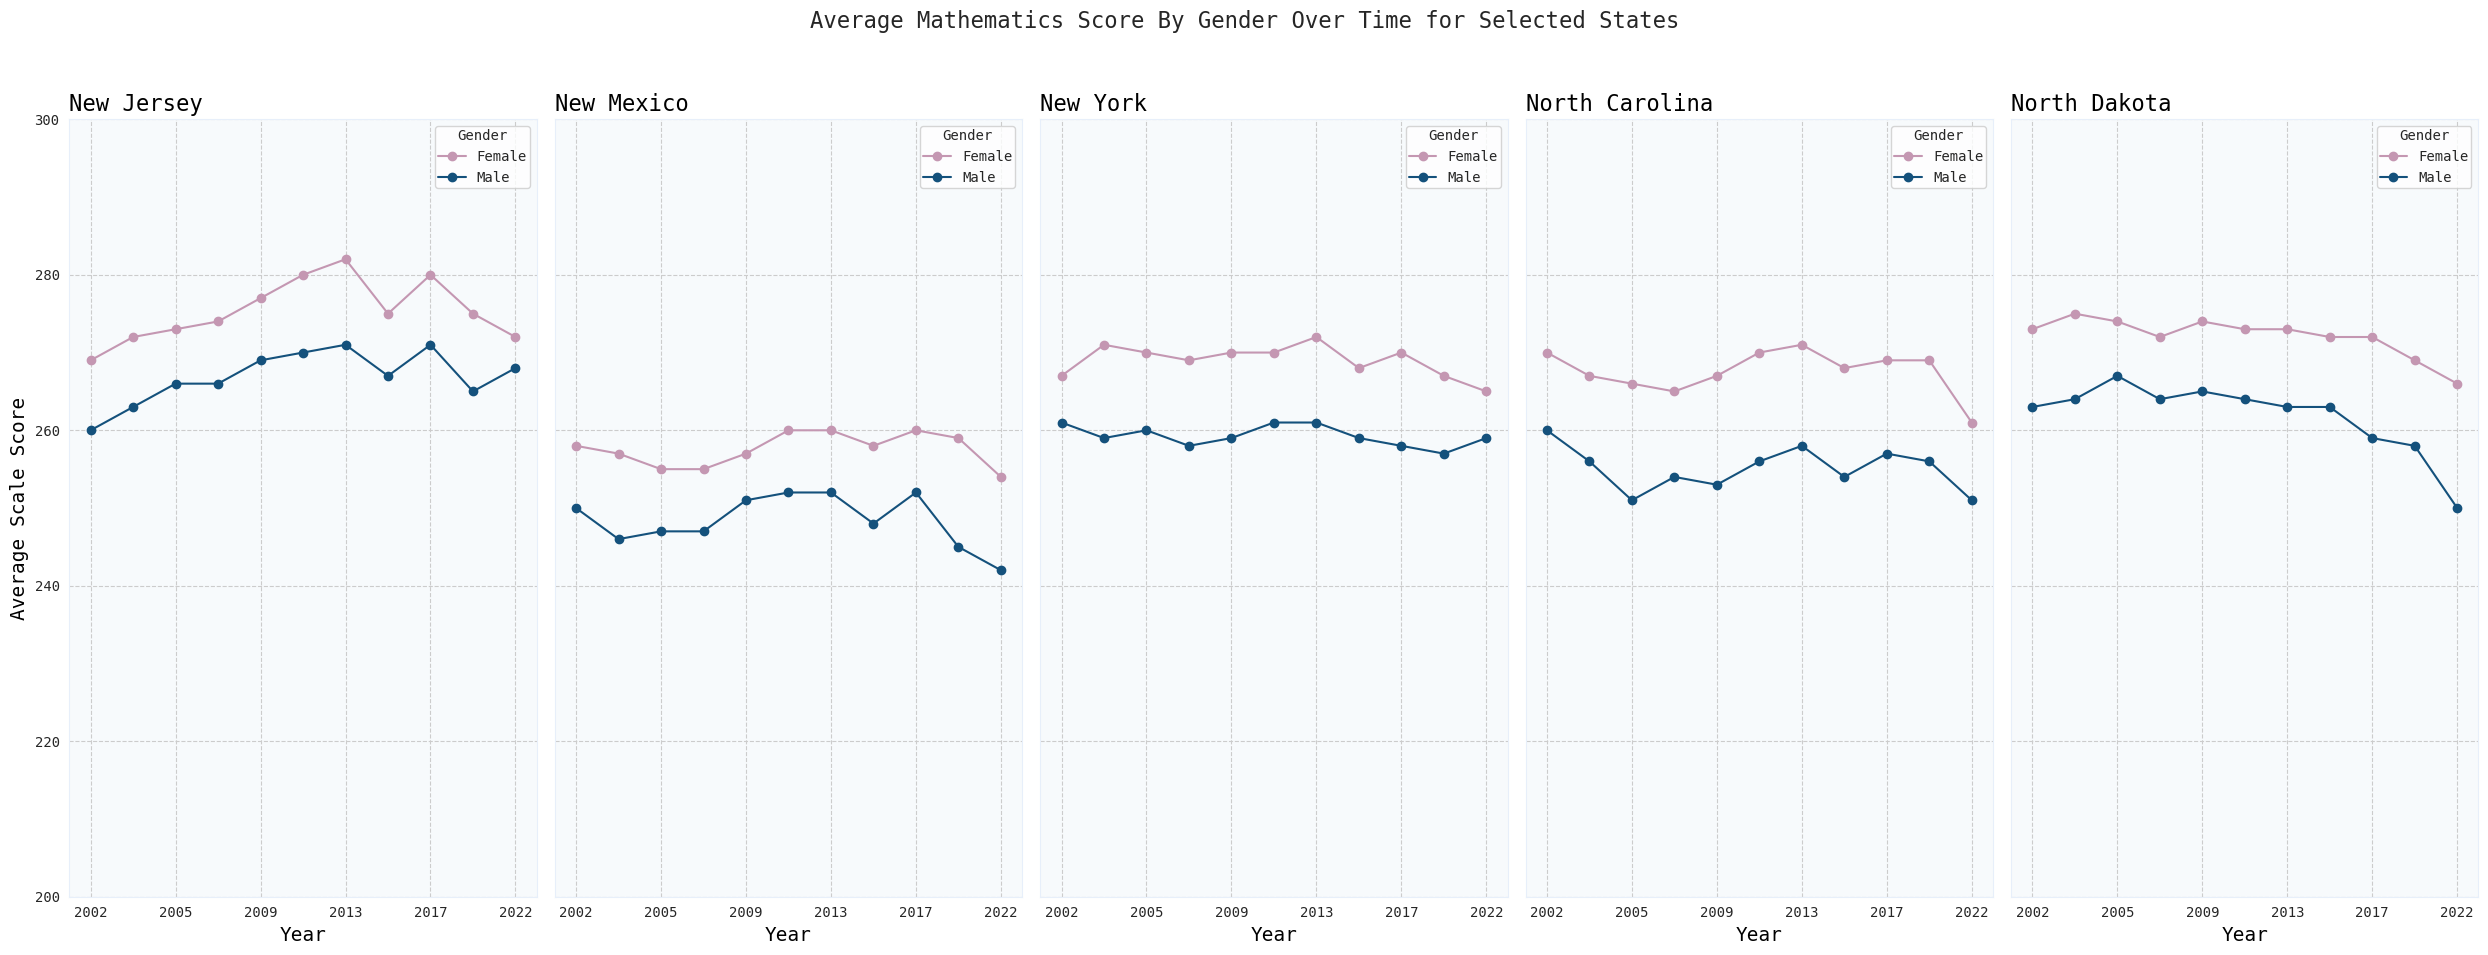

In [21]:
plot(states_7)

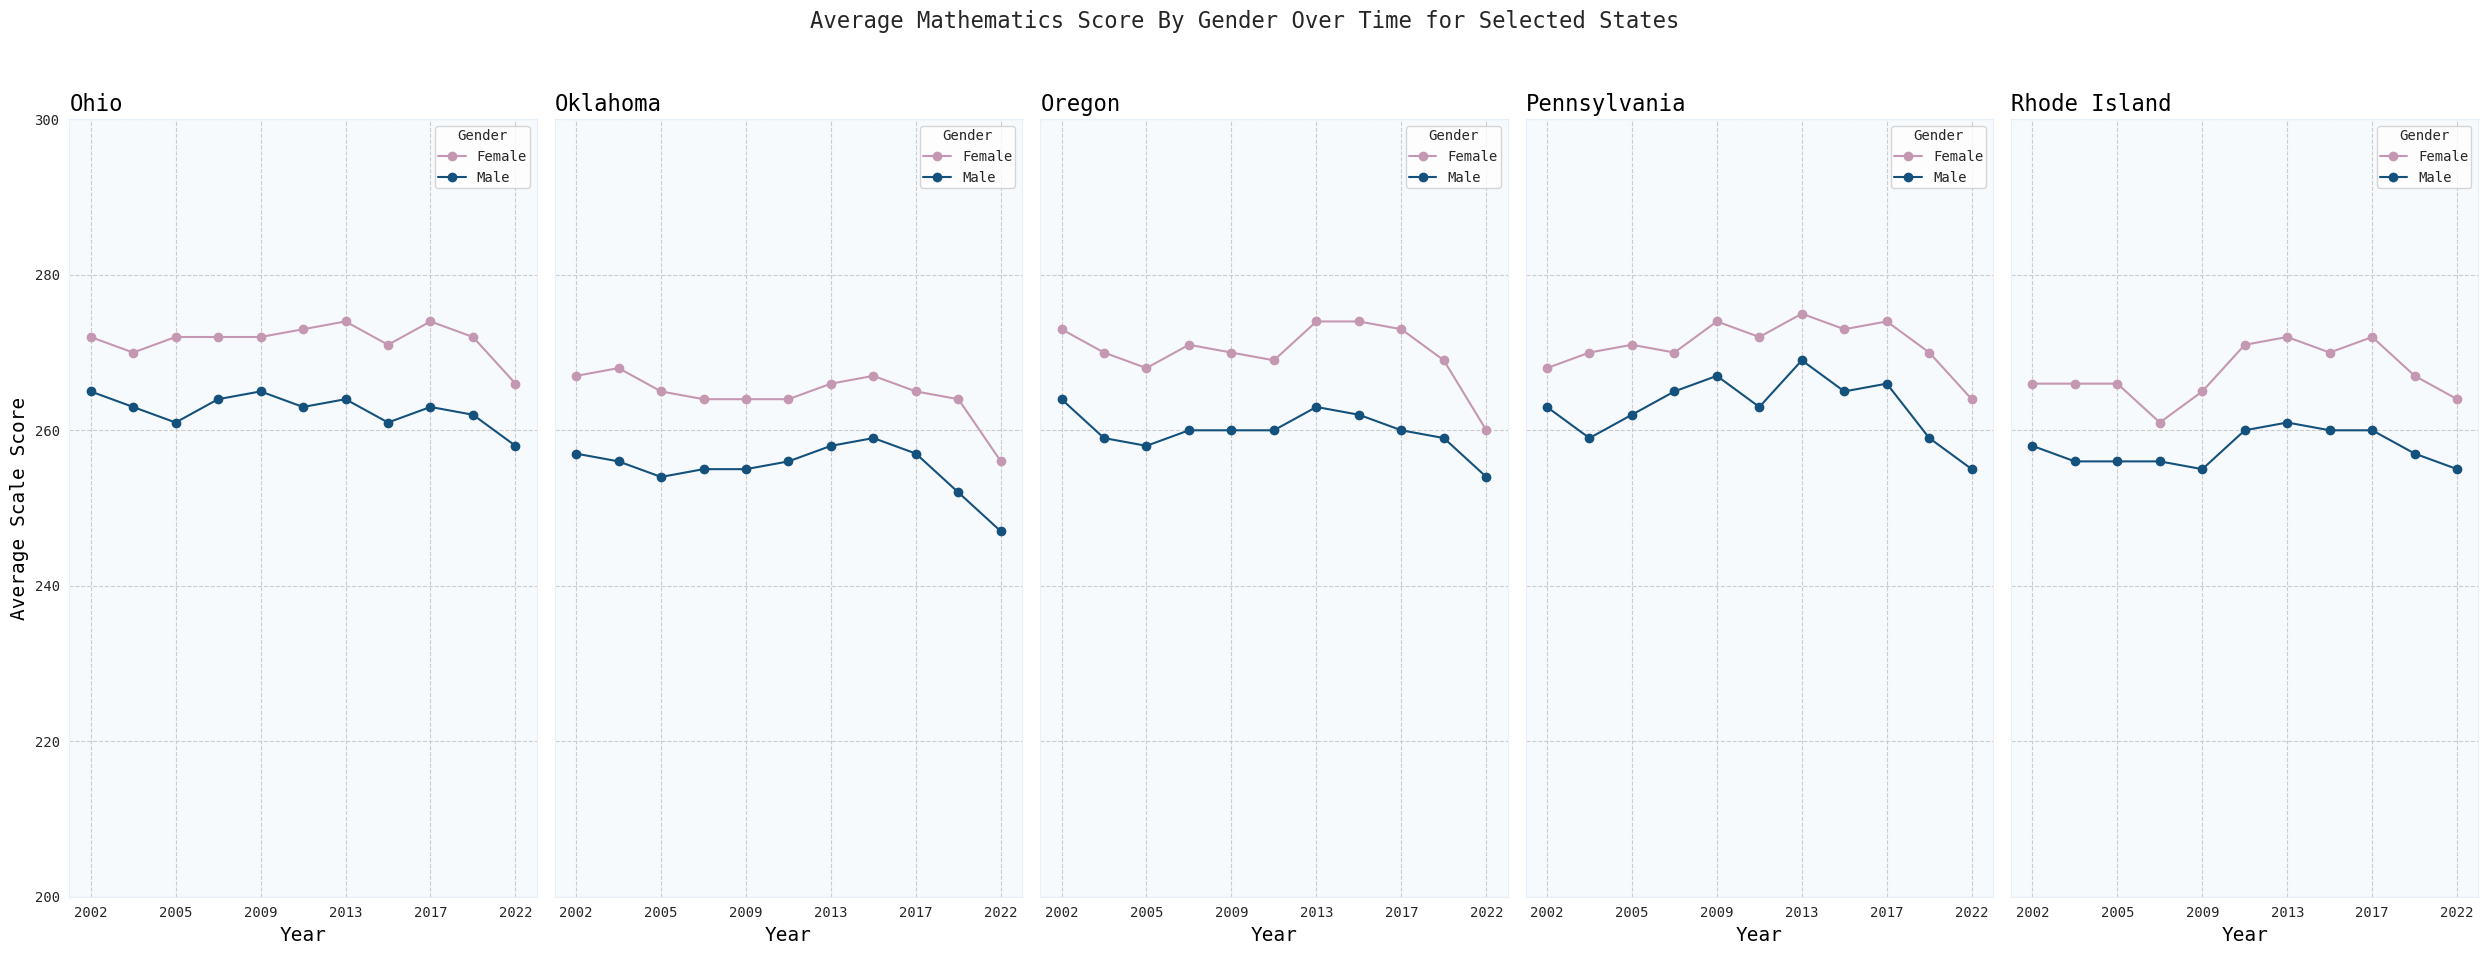

In [22]:
plot(states_8)

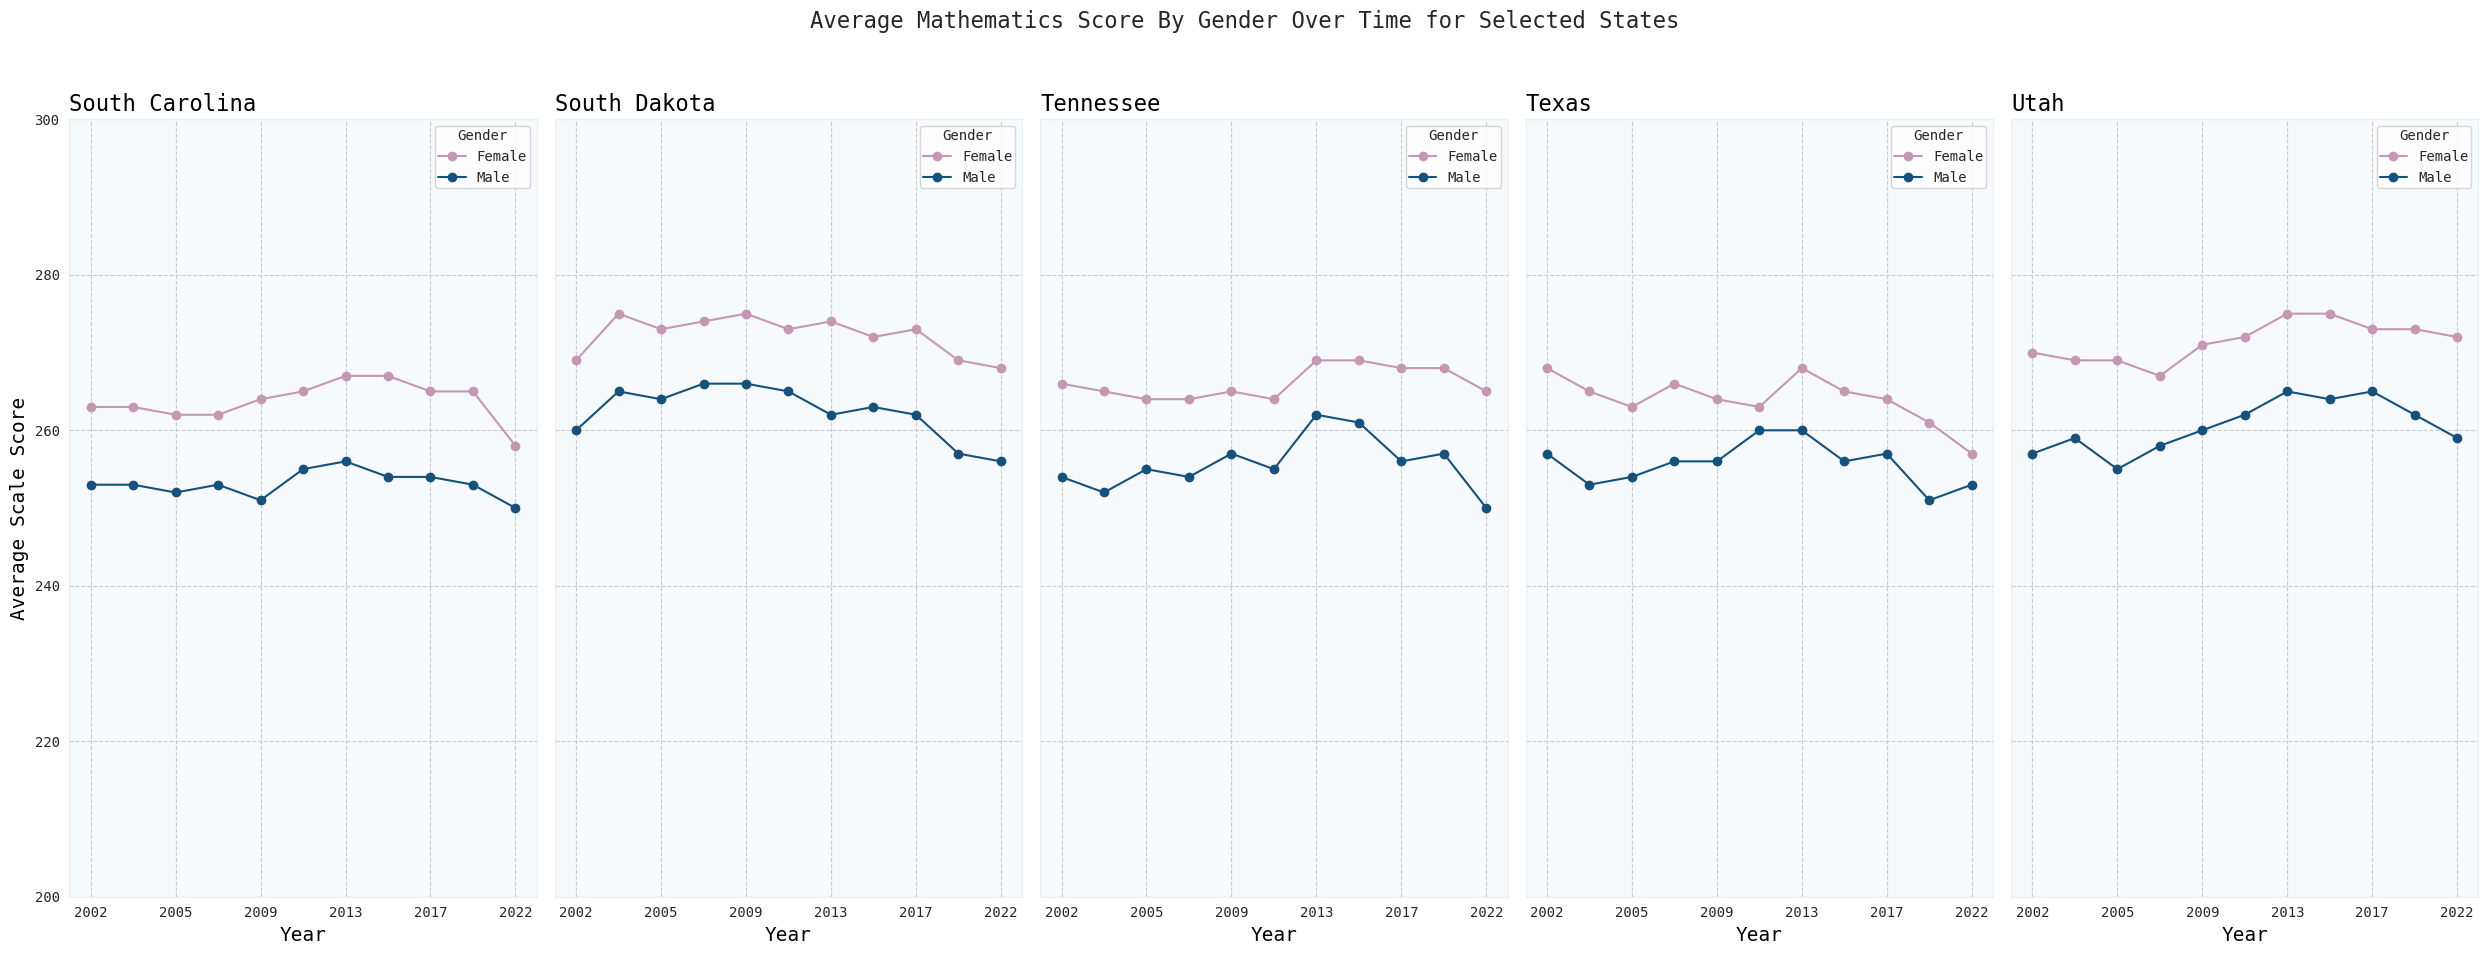

In [23]:
plot(states_9)

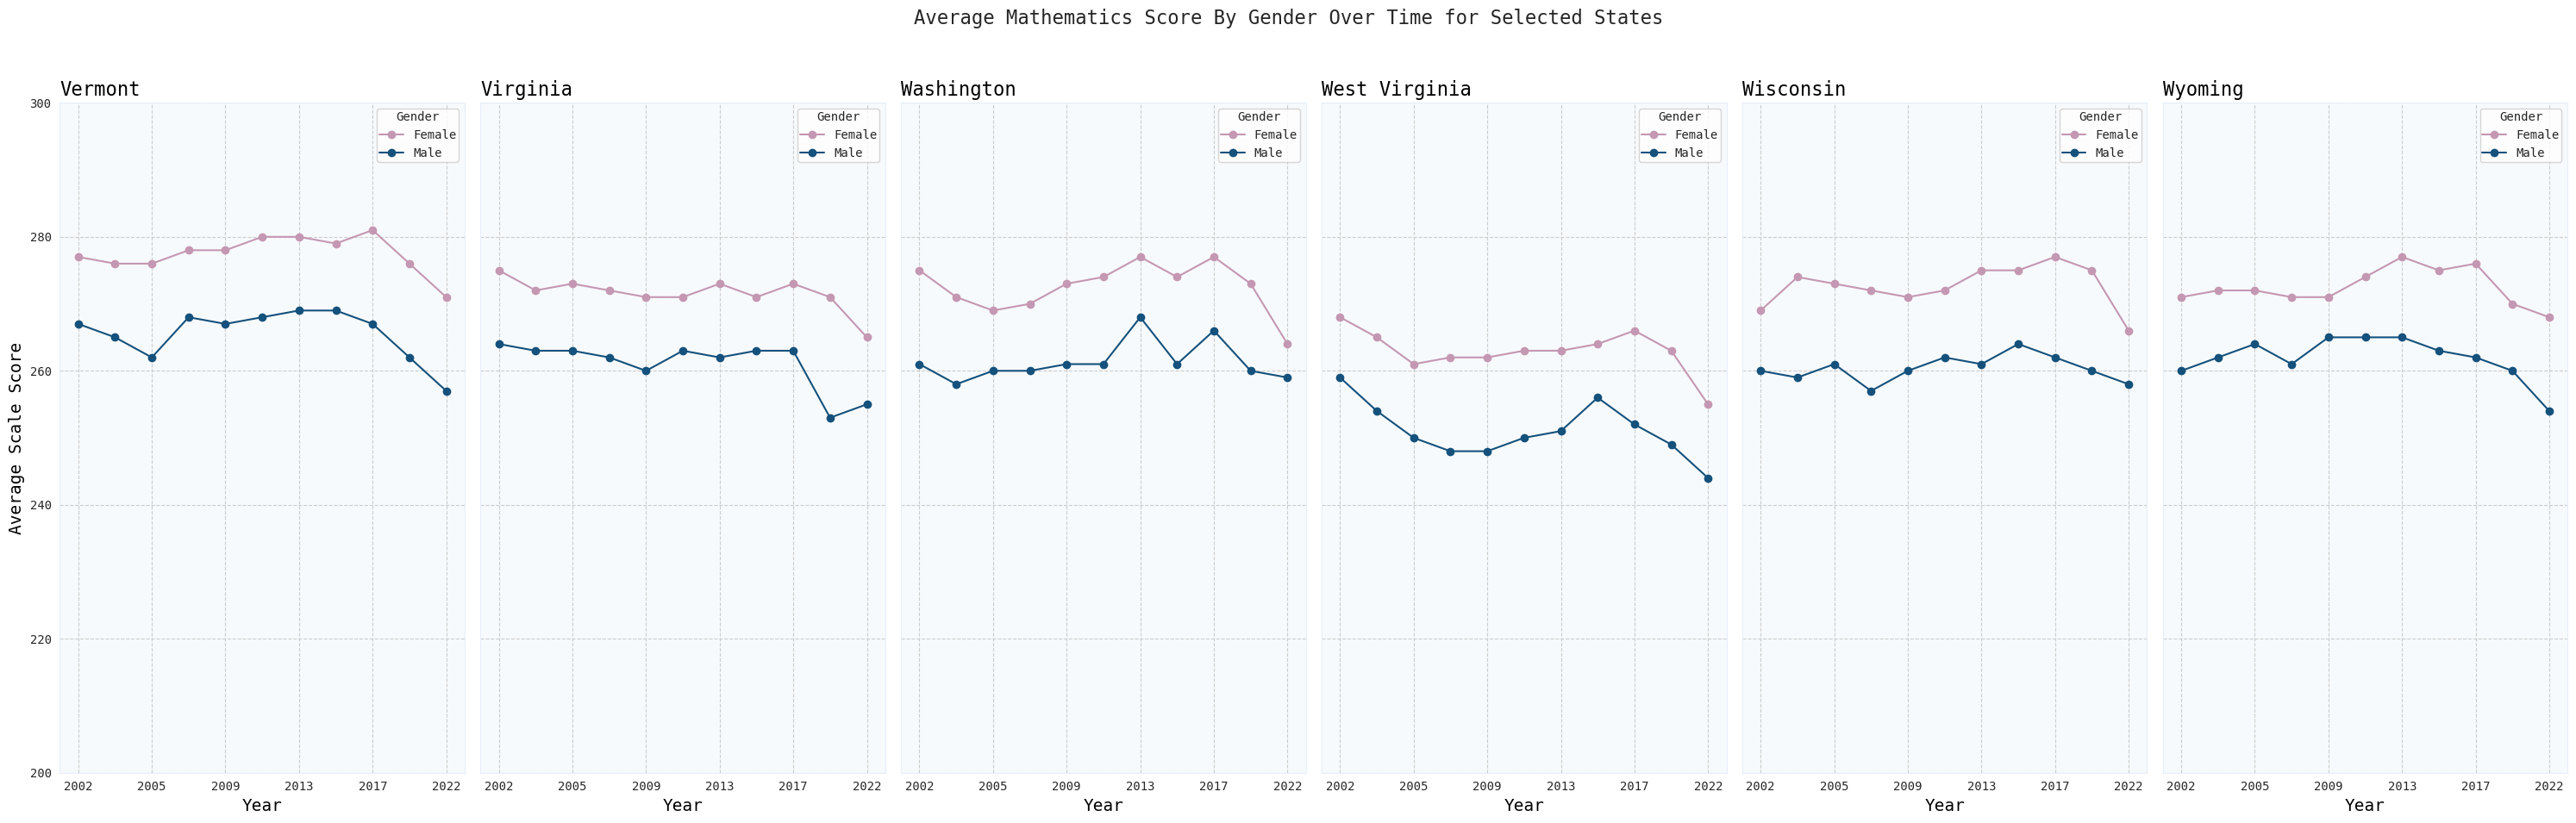

In [24]:
plot(states_10)